# How to work with Stata

* **Difficulty level**: easy
* **Time need to lean**: 10 minutes or less
* **Key points**:
  * Stata does not have variables in the usual sense so SoS exchanges Stata Dataset and macros with a stata kernel

## Installation

If you have a working installation of [Stata](https://www.stata.com/), you can install the [stata_kernel](https://github.com/kylebarron/stata_kernel) and then the `sos-stata` language module. 

## Overview <a id="Stata"></a>

Stata, similar to SAS, has one and only one **unnamed current dataset** in memory. It also supports **named, untyped macros**. SoS supports the exchange of variables between Stata and other kernels as follows:

When pushing data to `Stata`

| Python  | variable name | Stata |
| --- | ---| ---|
| `int`, `float`, `str` | variable name become macro name |  local macro (`string`) |
| `pandas.DataFrame` | unnamed in Stata | Stata Dataset |


When getting data from `Stata`

| Stata  | variable name | Type in Python |
| --- | --- |  ---|
| local macros | name of macro | `str` |
| global macros | name of macro | `str` |
| Dataset  | user specified | `pandas.DataFrame` |

Note that non-dataframe variables are transferred to Stata as local macros, and both local and global macros can be transferred although local macros will be checked first.

## Using `%expand` magic

For example, if you have a directory and filenames defined in SoS

In [1]:
datadir = '~/Downloads/StataIntro/dataSets'
filename = 'gss.dta'

You can use the variables instantly in Stata with SoS' own `%expand` magic,

In [2]:
%expand
cd {datadir}
use {filename}
ds


/Users/bpeng1/Downloads/StataIntro/dataSets


marital  age      educ     sex      inc      happy    region


## Passing variables as macros

However, if you prefer, you can transferred the variables as local macros in Stata

In [3]:
%get datadir filename
macro list

S_FNDATE:       11 Sep 2009 09:55
S_FN:           gss.dta
stata_kernel_graph_counter:
                0
S_ADO:          BASE;SITE;.;PERSONAL;PLUS;OLDPLACE;`"/Users/bpeng1/anaconda3/envs/sos/lib/python3.6/site-packages/stata_kernel/ado"'
S_level:        95
F1:             help advice;
F2:             describe;
F7:             save
F8:             use
S_StataMP:      MP
S_StataSE:      SE
S_CONSOLE:      console
S_FLAVOR:       Intercooled
S_OS:           Unix
S_MACH:         Macintosh (Intel 64-bit)
_filename:      gss.dta
_datadir:       ~/Downloads/StataIntro/dataSets


and use the macros in Stata

In [4]:
cd `datadir'
use `filename'
ds


/Users/bpeng1/Downloads/StataIntro/dataSets


marital  age      educ     sex      inc      happy    region


## Passing dataframes to Stata as Stata dataset

Now if you have a dataframe, for example, `mtcard` in R, getting them in Stata will **replace the current dataset**, and the name `mtcars` no longer matters.

In [5]:
%get mtcars --from R
summarize

Loading required package: feather



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
       index |          0
         mpg |         32    20.09062    6.026948       10.4       33.9
         cyl |         32      6.1875    1.785922          4          8
        disp |         32    230.7219    123.9387       71.1        472
          hp |         32    146.6875    68.56287         52        335
-------------+---------------------------------------------------------
        drat |         32    3.596563    .5346787       2.76       4.93
          wt |         32     3.21725    .9784574      1.513      5.424
        qsec |         32    17.84875    1.786943       14.5       22.9
          vs |         32       .4375    .5040161          0          1
          am |         32      .40625    .4989909          0          1
-------------+---------------------------------------------------------
        gear |         32      3.6875

(bin=5, start=52, width=56.6)


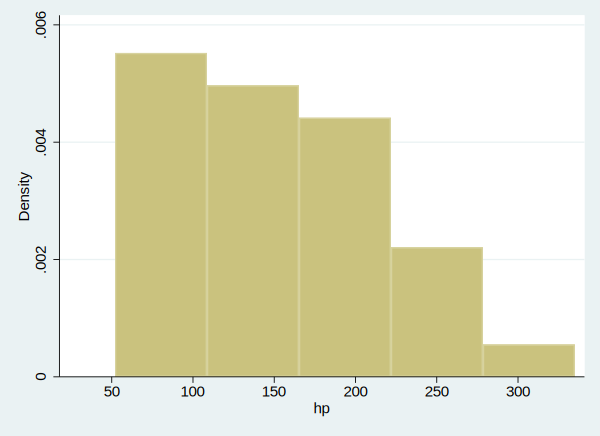

In [6]:
hist hp

Sending macros and/or dataset to another kernel is a bit tricky because local and global macros can have the same name, and the dataset is unnamed. The rule is that

1. If the name represents a local macro, send it as string
2. Otherwise if the name represents a global macro, send it as string
3. Otherwise send the current dataset as a DataFrame using the provided name

For example, because `mydata` is not one of the macros, it will become the name of the DataFrame representing the Stata dataset:

In [7]:
%get mydata --from Stata
mydata

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
1,Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
2,Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
3,Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
4,Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
5,Valiant,18.1,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
6,Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
7,Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
8,Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
9,Merc 280,19.2,6.0,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0


The macros can be obtained 

In [8]:
%get S_ADO --from Stata
S_ADO

'BASE;SITE;.;PERSONAL;PLUS;OLDPLACE;`"/Users/bpeng1/anaconda3/envs/sos/lib/python3.6/site-packages/stata_kernel/ado"\''

and Stata supports the automatic transfer of variables (macros) with names starting with `sos`. For example,

In [9]:
local sosres 3.14159

but remember macros are untyped so they will be transferred as strings:

In [10]:
sosres

'3.14159'

The `%sessioninfo` magic lists the version of Stata when the `stata` kernel is used:

## Further reading

* [How to exchange variables among living subkernels](doc/user_guide/exchange_variable.html)